In [ ]:
Pkg.add("Graphs")
Pkg.add("GraphLayout")

In [12]:
using Plots
pyplot(size=(500,300))
import Graphs, GraphLayout

In [70]:
n = 5
g = Graphs.simple_graph(n)
for (i,j) in [(1,2),(2,3),(1,3),(2,4),(3,5)]
    Graphs.add_edge!(g, i, j)
end
g

Directed Graph (5 vertices, 5 edges)

In [71]:
am = Graphs.adjacency_matrix(g)

5x5 Array{Bool,2}:
 false   true   true  false  false
 false  false   true   true  false
 false  false  false  false   true
 false  false  false  false  false
 false  false  false  false  false

In [72]:
x, y = GraphLayout.layout_spring_adj(am)

([-1.0,-0.3402313606650742,0.16164841033943,-0.4269557453303815,1.0],[0.2098895084460488,-0.2904015471894834,0.41302568893816627,-1.0,1.0])

In [62]:
function graph_edge_lists(x, y)
    edgex, edgey = zeros(0), zeros(0)
    for i=1:n, j=1:n
        if am[i,j]
            append!(edgex, [x[i], x[j], NaN])
            append!(edgey, [y[i], y[j], NaN])
        end
    end
    edgex, edgey
end

graph_edge_lists (generic function with 1 method)

In [73]:
edgex, edgey = graph_edge_lists(x, y)
@show edgex edgey;

edgex = [-1.0,-0.3402313606650742,NaN,-1.0,0.16164841033943,NaN,-0.3402313606650742,0.16164841033943,NaN,-0.3402313606650742,-0.4269557453303815,NaN,0.16164841033943,1.0,NaN]
edgey = [0.2098895084460488,-0.2904015471894834,NaN,0.2098895084460488,0.41302568893816627,NaN,-0.2904015471894834,0.41302568893816627,NaN,-0.2904015471894834,-1.0,NaN,0.41302568893816627,1.0,NaN]


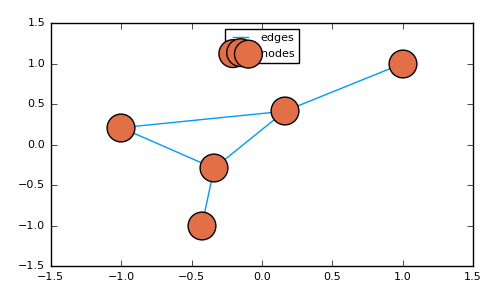

In [76]:
with(leg=:top, grid=false) do
    plot(edgex, edgey, lab="edges")
    scatter!(x, y, m=20, lab="nodes")
end